In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


C:\Users\klysm\AppData\Local\Temp\ipykernel_27024\3538350959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#carregar arquivos csv 
navios_sines_imos = pd.read_csv('dataset_navios_with_imos.csv')
imos_navios_caracteristicas = pd.read_csv('df_imos_caracteristicas.csv')
porto_sines_caracteristicas = pd.read_csv('porto_caracteristicas_terminais.csv', encoding='latin1')

In [5]:
#faça o merge dos dataframes navios_sines_imos e imos_navios_caracteristicas com base na coluna Imo e IMO number
navios_sines_imos = pd.merge(navios_sines_imos, imos_navios_caracteristicas, left_on='Imo', right_on='IMO number')

In [8]:
navios_sines_imos.head(10)

,Berth Name,Terminal Name,Time At Berth,Time At Port,Vessel Type - Generic,Commercial Market,Voyage Distance Travelled,Voyage Speed Average,Imo,Voyage Origin Port,...,Engine type,Year of build,Builder,Classification society,Home port,Owner,Manager,Description,Engine model,Engine power
0,Container,Container Terminal XXI,14.5,15.0,Container Ship,CONTAINER SHIPS,1208.0,15.9,9279977,ANTWERP,...,NaN,2004,HYUNDAI SAMHO HEAVY INDUSTRIES CO. LTD. - MOKP...,GERMANISCHER LLOYD,Panama,NaN,NaN,MSC POH LIN is a Container ship built in 2004 ...,NaN,NaN
1,7,Oil and Products Terminal,18.9,19.2,LPG Tanker,LPG CARRIERS,27.0,4.8,9261578,LISBOA,...,Schottel,2004,"CANTIERE NAVALE DE POLI - VENEZIA, ITALY",NaN,NaN,"LUMASHIP - NAPOLI, ITALY","LUMASHIP - NAPOLI, ITALY",MADDY is a LPG carrier built in 2004 by CANTIE...,STP 550,2100 KW
2,6,Oil and Products Terminal,17.5,41.2,Oil Products Tanker,WET BULK,4.0,5.2,9428671,SINES,...,Daihatsu,2007,"SOPO SHIPYARD - ZHENJIANG, CHINA",BUREAU VERITAS,SANTA CRUZ DE TENERIFE,"NAVIERA MURUETA - BILBAO, SPAIN","NAVIERA MURUETA - BILBAO, SPAIN",BAHIA TRES is a Oil tanker built in 2007 by SO...,6DS-32,3500 KW
3,Container,Container Terminal XXI,22.1,22.2,Container Ship,CONTAINER SHIPS,281.0,14.9,9289099,ALGECIRAS,...,MAN-B&W,2005,"HANJIN HEAVY INDUSTRIES CO. LTD. - BUSAN, SOUT...",GERMANISCHER LLOYD,HAMBURG,"OFFEN REEDEREI - HAMBURG, GERMANY","OFFEN REEDEREI - HAMBURG, GERMANY",MSC BEIJING is a Container ship built in 2005 ...,12RTA-96C,61800 KW
4,3,Oil and Products Terminal,0.3,16.9,Fire Fighting Vessel,SUPPORTING VESSELS,2.0,5.2,9319179,SINES ANCH,...,NaN,2005,"ASTILLEROS ZAMAKONA - BILBAO, SPAIN",BUREAU VERITAS,SINES,"REBOPORT - SETUBAL, PORTUGAL","REBOPORT - SETUBAL, PORTUGAL",CASTELO DE SAO JORGE is a Other built in 2005 ...,NaN,NaN
5,3,Oil and Products Terminal,33.0,33.4,Oil/Chemical Tanker,WET BULK,1387.0,6.7,9373230,LEIXOES,...,B&W,2007,"SOLI SHIPYARD - ISTANBUL, TURKEY",REGISTRO ITALIANO NAVALE,PALERMO,"ELBANA DI NAVIGAZIONE - PIOMBINO, ITALY","ELBANA DI NAVIGAZIONE - PIOMBINO, ITALY",AETHALIA is a Chemical/Oil tanker built in 200...,8s35mc,5920 KW
6,3,Oil and Products Terminal,0.4,25.1,Fire Fighting Vessel,SUPPORTING VESSELS,2.0,5.3,9319179,SINES,...,NaN,2005,"ASTILLEROS ZAMAKONA - BILBAO, SPAIN",BUREAU VERITAS,SINES,"REBOPORT - SETUBAL, PORTUGAL","REBOPORT - SETUBAL, PORTUGAL",CASTELO DE SAO JORGE is a Other built in 2005 ...,NaN,NaN
7,Container,Container Terminal XXI,16.8,17.2,Container Ship,CONTAINER SHIPS,1314.0,16.7,9403396,GIOIA TAURO,...,MAN-B&W,2009,"HANJIN SUBIC SHIPYARD - OLONGAPO, PHILIPPINES",GERMANISCHER LLOYD,MONROVIA,"NSC HOLDING - HAMBURG, GERMANY","NSC HOLDING - HAMBURG, GERMANY",MSC CANCUN is a Container ship built in 2009 b...,8K90MC-C,36560 KW
8,Sines LNG,REN Atlantico Terminal LNG,1.4,25.1,Fire Fighting Vessel,SUPPORTING VESSELS,2.0,5.3,9319179,SINES,...,NaN,2005,"ASTILLEROS ZAMAKONA - BILBAO, SPAIN",BUREAU VERITAS,SINES,"REBOPORT - SETUBAL, PORTUGAL","REBOPORT - SETUBAL, PORTUGAL",CASTELO DE SAO JORGE is a Other built in 2005 ...,NaN,NaN
9,Container,Container Terminal XXI,15.7,16.0,Container Ship,CONTAINER SHIPS,1908.0,14.5,9279965,NEMRUT,...,NaN,2004,HYUNDAI SAMHO HEAVY INDUSTRIES CO. LTD. - MOKP...,GERMANISCHER LLOYD,Panama,NaN,NaN,MSC FABIENNE is a Container ship built in 2004...,NaN,NaN


In [9]:
#contar nulls no dataframe em cada coluna
navios_sines_imos.isnull().sum()

Berth Name                      0
Terminal Name                   0
Time At Berth                   0
Time At Port                    0
Vessel Type - Generic           0
Commercial Market               0
Voyage Distance Travelled       0
Voyage Speed Average            0
Imo                             0
Voyage Origin Port              0
IMO number                      0
MMSI                            1
Name of the ship                0
Former names                  556
Vessel type                     0
Operating status                1
Flag                            0
Gross tonnage                   0
Deadweight                      1
Length                          1
Breadth                         1
Engine type                  1222
Year of build                   0
Builder                        20
Classification society        380
Home port                     358
Owner                         273
Manager                       273
Description                     0
Engine model  

In [10]:
df_modelagem = navios_sines_imos[['Berth Name', 'Terminal Name', 'Time At Berth', 'Time At Port' , 'Vessel Type - Generic', 'Commercial Market','Voyage Distance Travelled', 'Voyage Speed Average', 'Year of build', 'Voyage Origin Port', 'Flag', 'Gross tonnage', 'Deadweight', 'Length', 'Breadth' ]]

In [14]:
#remover linhas  com valores nulos
df_modelagem = df_modelagem.dropna()

In [16]:
df_modelagem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1770 entries, 0 to 1770
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Berth Name                 1770 non-null   object 
 1   Terminal Name              1770 non-null   object 
 2   Time At Berth              1770 non-null   float64
 3   Time At Port               1770 non-null   float64
 4   Vessel Type - Generic      1770 non-null   object 
 5   Commercial Market          1770 non-null   object 
 6   Voyage Distance Travelled  1770 non-null   float64
 7   Voyage Speed Average       1770 non-null   float64
 8   Year of build              1770 non-null   int64  
 9   Voyage Origin Port         1770 non-null   object 
 10  Flag                       1770 non-null   object 
 11  Gross tonnage              1770 non-null   object 
 12  Deadweight                 1770 non-null   object 
 13  Length                     1770 non-null   object 
 1

In [17]:
from sklearn.preprocessing import LabelEncoder

df_modelagem = df_modelagem.copy()

# Encode all columns object type to integer
for column in df_modelagem.columns:
    if df_modelagem[column].dtype == type(object):
        le = LabelEncoder()
        df_modelagem[column] = le.fit_transform(df_modelagem[column])

df_modelagem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1770 entries, 0 to 1770
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Berth Name                 1770 non-null   int32  
 1   Terminal Name              1770 non-null   int32  
 2   Time At Berth              1770 non-null   float64
 3   Time At Port               1770 non-null   float64
 4   Vessel Type - Generic      1770 non-null   int32  
 5   Commercial Market          1770 non-null   int32  
 6   Voyage Distance Travelled  1770 non-null   float64
 7   Voyage Speed Average       1770 non-null   float64
 8   Year of build              1770 non-null   int64  
 9   Voyage Origin Port         1770 non-null   int32  
 10  Flag                       1770 non-null   int32  
 11  Gross tonnage              1770 non-null   int32  
 12  Deadweight                 1770 non-null   int32  
 13  Length                     1770 non-null   int32  
 1

In [18]:
from sklearn.model_selection import train_test_split

X = df_modelagem.drop('Time At Berth', axis=1)
y = df_modelagem['Time At Berth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#modelo de reandom forest refressor para prever o tempo de atracação
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model_rf = RandomForestRegressor(n_estimators=50, random_state=12)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)


In [20]:
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')

#R quadrado
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_rf)
print(f'R^2: {r2}')

Mean Squared Error: 35.1545260111151
R^2: 0.9308356553569467


In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error: {mse}')
print(f"R² (Linear Regression): {r2_lr}")

Mean Squared Error: 323.30222009282505
R² (Linear Regression): 0.3639229791551061


C:\Users\klysm\AppData\Local\Temp\ipykernel_27024\3392918068.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(residuals, kde=True, color='blue', palette='viridis', cbar=True )
c:\Users\klysm\miniconda3\envs\ips_cienciadedados\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


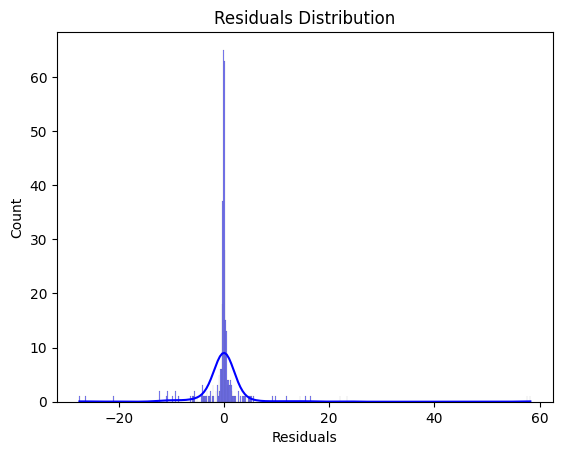

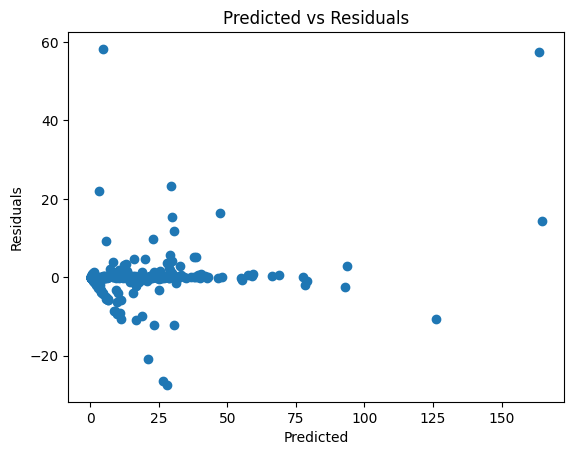

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred_rf
sns.histplot(residuals, kde=True, color='blue', palette='viridis', cbar=True )
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

plt.scatter(y_pred_rf, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.show()

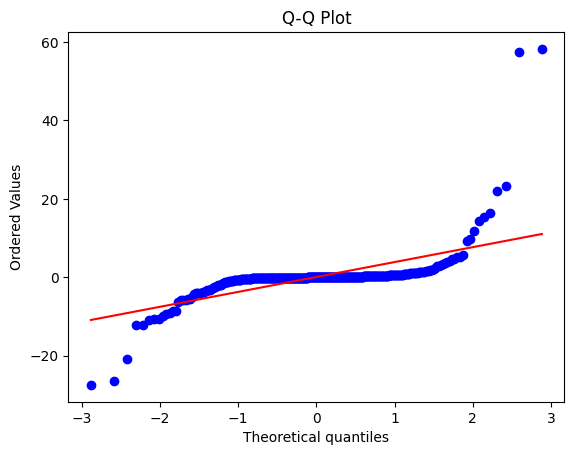

In [23]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

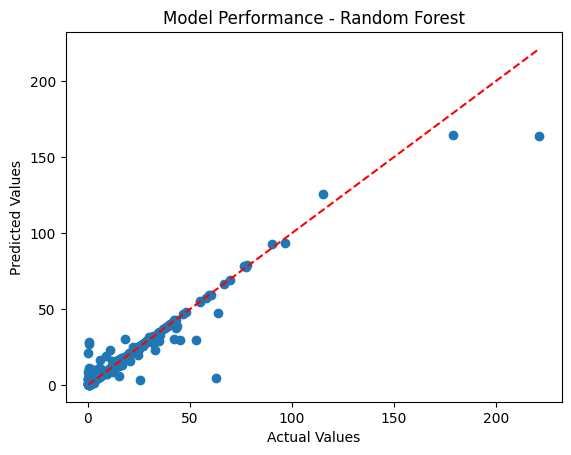

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, y_pred_rf)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Performance - Random Forest')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

# Show the plot
plt.show()